# Discussão sucinta

## Formalização do Problema


Racionais MCs transcendem gerações e representam uma multiplicidade de experiências pessoais e contextos para inúmeras pessoas. Há até mesmo uma famosa frase que diz "para toda situação da vida, um verso dos Racionais". A motivação primordial, além de prestar homenagem a um dos maiores grupos de RAP da história, é a busca por novas linhas que se encaixem no contexto do grupo. Ao obter rimas coesas e uma progressão musical embasada, o objetivo é iniciar uma tentativa de generalização para o contexto do RAP.
Nesta etapa será implementado o script com a utilização de algoritmos de machine/deep learning para geração de novas letras de RAP a partir de letras do Racionais. Será uma etapa importante para o resultado final, pois a rede será treinada com as letras do Racionais para tentativa de gerar novas letras. Serão utilizados modelos pré-treinados, sendo eles https://huggingface.co/lucas-leme/FinBERT-PT-BR para a análise de sentimento das letras, o modelo https://huggingface.co/HeyLucasLeao/gpt-neo-small-portuguese e o https://huggingface.co/rufimelo/Legal-BERTimbau-base para geração de novas letras. O desempenho deles pode ser observado mais abaixo, neste mesmo estudo.

## Análise Exploratória dos Dados efetuada, detalhando as principais transformações executadas


Neste tópico, pode-se observar que foram necessárias algumas transformações para que o resultado do treinamento e execução do algoritmo sejam satisfatórios.
O pré-processamento das letras foi feito utilizando o "RSLPStemmer" para lematização das palavras (voltá-las para a forma base) e "stopwords" para remover as stop words contidas no texto, ambos da https://www.nltk.org/.
Após esta etapa, os versos são tokenizados, utilizando o tokenizador para que possa ser utilizado no treinamento do modelo pré-treinado.
Foi feita a análise de sentimentos do texto com intenção de utilizar os resultados na geração de novas letras a partir destes.
Além disso, caracteres especiais foram removidos do texto.

### Análise de sentimentos verso a verso

In [1]:
!pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     -------------------------------------- 42.0/42.0 kB 991.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.5 MB 9.9 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 9.7 MB/s eta 0:00:01
   ------------------------------------- -- 1.4/1.5 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.0 kB ? eta -:--:--
   ---------------------------------------- 269.0/269.0 kB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---------------------------------------- 301.8/301.8 kB 9.1 MB/s eta 0:00:00


In [3]:
!pip install transformers

     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     ---------------------------------------- 43.8/43.8 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   - -------------------------------------- 0.4/9.1 MB 8.9 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.1 MB 9.0 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.1 MB 11.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.1 MB 11.0 MB/s eta 0:00:01
   ------------ --------------------------- 2.8/9.1 MB 11.0 MB/s eta 0:00:01
   -------------- ------------------------- 3.3/9.1 MB 11.0 MB/s eta 0:00:01
   ----------------- ---------------------- 3.9/9.1 MB 11.0 MB/s eta 0:00:01
   -------------------- ------------------- 4.7/9.1 MB 10.7 MB/s eta 0:00:01
   --------------------------- ------------ 6.2/9.1 MB 11.0 MB/s eta 0:00:01
   ------------------------------ --------- 7.0/9.1 MB 11.0 MB/s eta 0:00:01
   --------

In [5]:
!pip install torch

   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.4/159.8 MB 8.3 MB/s eta 0:00:20
   ---------------------------------------- 0.5/159.8 MB 9.8 MB/s eta 0:00:17
   ---------------------------------------- 1.4/159.8 MB 9.6 MB/s eta 0:00:17
    --------------------------------------- 2.1/159.8 MB 10.3 MB/s eta 0:00:16
    --------------------------------------- 2.7/159.8 MB 10.7 MB/s eta 0:00:15
    --------------------------------------- 3.2/159.8 MB 10.7 MB/s eta 0:00:15
    --------------------------------------- 3.7/159.8 MB 10.8 MB/s eta 0:00:15
   - -------------------------------------- 4.3/159.8 MB 11.0 MB/s eta 0:00:15
   - -------------------------------------- 5.0/159.8 MB 11.0 MB/s eta 0:00:15
   - -------------------------------------- 5.4/159.8 MB 10.8 MB/s eta 0:00:15
   - -------------------------------------- 6.6/159.8 MB 9.8 MB/s eta 0:00:16
   - -------------------------------------- 7.6/159.8 MB 9.7 MB/

In [1]:
# Importação das bibliotecas necessárias
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from transformers import BertTokenizer, AutoTokenizer, BertForSequenceClassification
import torch
import csv
import torch
import re

# Download de recursos necessários para o NLTK
nltk.download('punkt')

c:\Users\CPD-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to C:\Users\CPD-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
def preprocess_text(text):
    tokenizer = AutoTokenizer.from_pretrained("rufimelo/Legal-BERTimbau-base")
    text = re.sub(r'[^\w\sáéíóúàèìòùâêîôûãõç]', '', text)

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    tokens = tokenizer.convert_ids_to_tokens(inputs.input_ids[0])

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

def analyze_sentiment(text):
    tokenizer = BertTokenizer.from_pretrained("lucas-leme/FinBERT-PT-BR")
    model = BertForSequenceClassification.from_pretrained("lucas-leme/FinBERT-PT-BR", num_labels=3)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}

    # Inferência
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits).item()

    # Mapeamento do índice da classe para sentimentos
    sentiment_map = {0: "Positivo", 1: "Negativo", 2: "Neutro"}
    sentiment = sentiment_map[predicted_class]

    return sentiment

In [3]:
url_arquivo = 'https://raw.githubusercontent.com/JotaChina/Computer-intelligence/update%231/TP2/RacionaisLyrics.raw'

response = requests.get(url_arquivo)
if response.status_code == 200:
    texto_raw = response.text
else:
    print("Falha ao fazer solicitação HTTP")

lines = texto_raw.split('\n')

with open('sentimento_racionais.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Linha Original', 'Linha Pré-processada', 'Sentimento'])
    for i, line in enumerate(lines):
        if line.strip():  # Ignorar linhas em branco
            sentiment = analyze_sentiment(line)
            preprocessed_line = preprocess_text(line)
            writer.writerow([line.strip(), preprocessed_line, sentiment])

print("Análise de sentimento concluída. Resultados salvos em 'sentimento_racionais.csv'.")

c:\Users\CPD-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\CPD-PC\.cache\huggingface\hub\models--lucas-leme--FinBERT-PT-BR. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\CPD-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingfa

Análise de sentimento concluída. Resultados salvos em 'sentimento_racionais.csv'.


O texto terá alguns tokens especiais do modelo, sendo eles

[CLS] = Token de início da sentença; e

[SEP] = Token de separação das sentenças. 

In [5]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -------------------------------------- 165.5/165.5 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 9.8 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/8.0 MB 10.3 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/8.0 MB 10.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.0 MB 11.2 MB/s eta 0:00:01
   ------------- -------------------------- 2.7/8.0 MB 11.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.3/8.0 MB 11.5 MB/s eta 0:00:01
   ------------------- -------------------- 3.8/8.0 MB 11.6 MB/s eta 0:00:01
   --------------------- ------------------ 4.3/8.0 MB 11.5 MB/s eta 0:00:01
   ------------------------ --------------- 4.8/8.0 MB 11.5 MB/s eta 0:00:01
   --------------------------- ------------ 5.4/8.0 MB 11.5 MB/s eta 0:00:01
   ------

In [7]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#file_path = '/content/sentimento_racionais.csv'
file_path = 'sentimento_racionais.csv'
df = pd.read_csv(file_path, sep=',')

print(df.head())

                                 Linha Original  \
0                           Na Zona Sul, ei, ei   
1  Essa é dedicada para todos os MC's do Brasil   
2                Que veio do sofrimento rimando   
3                E exercendo a profissão perigo   
4          É tudo nosso, tudo nosso, tudo nosso   

                                Linha Pré-processada Sentimento  
0                [CLS] Na Zona Sul e ##i e ##i [SEP]     Neutro  
1  [CLS] Essa é dedicada para todos os MC ##s do ...     Neutro  
2      [CLS] Que veio do sofrimento ri ##mando [SEP]   Negativo  
3         [CLS] E exercendo a profissão perigo [SEP]     Neutro  
4     [CLS] É tudo nosso tudo nosso tudo nosso [SEP]     Neutro  


Agora vamos observar o resultado da análise de sentimento.

C:\Users\CPD-PC\AppData\Local\Temp\ipykernel_21844\331272204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentimento', data=df, palette='viridis')


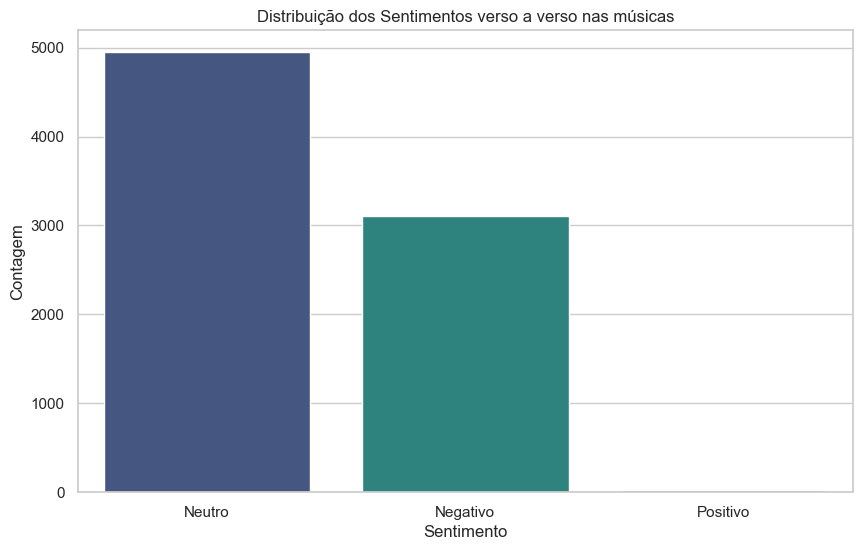

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentimento', data=df, palette='viridis')
plt.title('Distribuição dos Sentimentos verso a verso nas músicas')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()

### Análise de sentimentos em blocos de 4 versos

In [13]:
def preprocess_text(text):
    tokenizer = AutoTokenizer.from_pretrained("rufimelo/Legal-BERTimbau-base")
    text = re.sub(r'[^\w\sáéíóúàèìòùâêîôûãõç]', '', text)

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    tokens = tokenizer.convert_ids_to_tokens(inputs.input_ids[0])

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

def analyze_sentiment(text):
    tokenizer = BertTokenizer.from_pretrained("lucas-leme/FinBERT-PT-BR")
    model = BertForSequenceClassification.from_pretrained("lucas-leme/FinBERT-PT-BR", num_labels=3)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    inputs = {key: tensor.to(device) for key, tensor in inputs.items()}

    # Inferência
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits).item()

    # Mapeamento do índice da classe para sentimentos
    sentiment_map = {0: "Positivo", 1: "Negativo", 2: "Neutro"}
    sentiment = sentiment_map[predicted_class]

    return sentiment

In [14]:
url_arquivo = 'https://raw.githubusercontent.com/JotaChina/Computer-intelligence/update%231/TP2/RacionaisLyrics.raw'

response = requests.get(url_arquivo)
if response.status_code == 200:
    texto_raw = response.text
else:
    print("Falha ao fazer solicitação HTTP")

lines = texto_raw.split('\n')

with open('sentimento_racionais_4x4.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Bloco de Linhas', 'Bloco Pré-processado', 'Sentimento'])

    for i in range(0, len(lines), 4):
        # Agrupar 4 linhas
        block = lines[i:i + 4]
        block_text = ' '.join([line.strip() for line in block if line.strip()]) 
        if block_text:
            sentiment = analyze_sentiment(block_text)
            preprocessed_block = preprocess_text(block_text)
            writer.writerow([block_text, preprocessed_block, sentiment])

print("Análise de sentimento concluída. Resultados salvos em 'sentimento_racionais_4x4.csv'.")

O texto terá alguns tokens padrões do modelo, sendo eles

[CLS] = Token de início da sentença; e

[SEP] = Token de separação das sentenças. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/sentimento_racionais_4x4.csv'
df = pd.read_csv(file_path, sep=',')

print(df.head())

Agora vamos observar o resultado da análise de sentimentos.

                                     Bloco de Linhas  \
0  Na Zona Sul, ei, ei Essa é dedicada para todos...   
1  É tudo nosso, tudo nosso, tudo nosso Quem é vo...   
2  Vai, Zé Buceta Sai da sombra Cai, então toma, ...   
3  Mostra a cara Mister M Vem pra ver como é bom ...   
4  Nem vem, nem vem Sofredor aqui tem sensor Não ...   

                                Bloco Pré-processado Sentimento  
0  zon sul , ei , ei dedic tod mc 's brasil vei s...     Neutro  
1  tud , tud , tud fal qu ? escond igual mulh trá...   Negativo  
2  vai , zé bucet sai sombr cai , ent tom , mund ...   Negativo  
3  mostr car mist m vem pra ver bom pod cheg alt ...     Neutro  
4                vem , vem sofr aqu sensor rei , réu   Negativo  


<ipython-input-3-c3cbbdee33c6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentimento', data=df, palette='viridis')


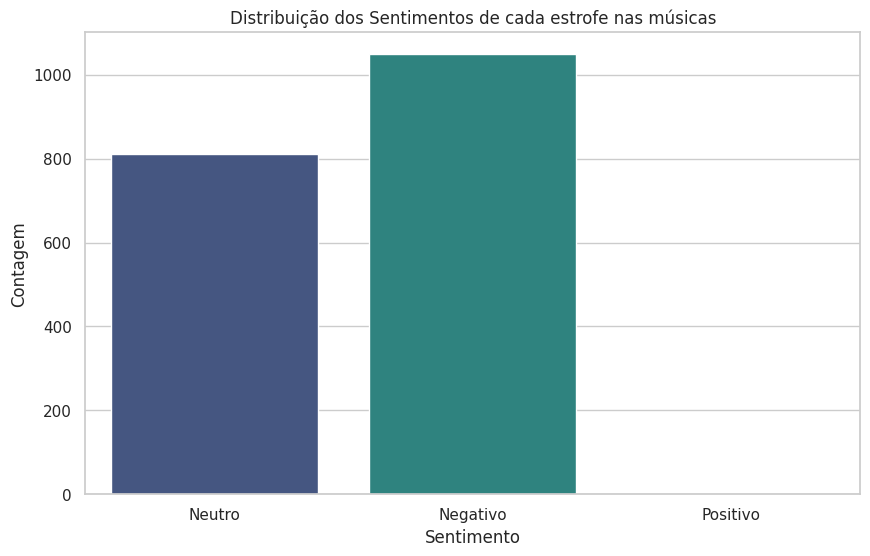

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentimento', data=df, palette='viridis')
plt.title('Distribuição dos Sentimentos de cada estrofe nas músicas')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()

Foi possível observar que ao fazer a análise de sentimentos a partir dos blocos de rima (contendo mais contexto para ser analisado) o sentimento negativo encontra-se mais presente. Pode-se utilizar o sentimento medio do texto como feature para a geração de novas letras. 

## Detalhamento do(s) Algoritmo(s) (explicação básica do método)

A ideia do algoritmo é gerar novas letras de RAP a partir da base de dados treinada.
Para garantir que o vies seja o universo RAP, foi necessário importar a base de dados contendo todas as músicas do Racionais disponíveis em https://www.letras.mus.br/racionais-mcs/.

## Motivos que justificam a escolha do(s) algoritmo(s) para seu problema

A utilização do modelo https://huggingface.co/lucas-leme/FinBERT-PT-BR para a análise de sentimentos foi encorajada a partir de testes com alguns outros modelos para análise de sentimentos para a língua portuguesa. O modelo em questão obteve resultados mais consistentes para a necessidade deste trabalho. Mesmo não contendo o vies deste universo de pesquisa, o algoritmo teve um desempenho satisfatório na análise.
A utilização de um modelo pré-treinado da família BERT foi encorajada pelo treinamento proposto para estes tipo de modelos. O escolhido foi (........) por sua finalidade de predição de texto para a língua portuguesa e, em testes iniciais, já conseguia inferir com um êxito satisfatório.
Contudo, a utilização de um modelo pré-treinado da família GPT foi encorajado pela finalidade deste tipo de modelo, geração de texto longo. Uma vez que a finalidade deste trabalho era a geração de novas letras de música.

Desta forma, ...........

# Trabalhos Correlatos (Revisão da Literatura)

Os trabalhos destacados abaixo trazem conceitos que podem e, possívelmente, serão aplicados neste trabalho. Pois os autores estão buscando a geração de texto a partir de letras musicais. O treinamento de uma rede LSTM é um dos conceitos mais utilizados pelos trabalhos que foram encontrados durante a pesquisa. Porém, no decorrer dos feedbacks e também em pesquisas, é visto com bons olhos a aplicação de modelos como BERTimbau, que já foi exibido acima e está sendo o instrumento escolhido.



* Gerando novas letras do Kanye West a partir de LSTM
https://github.com/robbiebarrat/rapping-neural-network
  
  O autor buscava gerar novas letras do Kanye West a partir de um LSTM. Porém, o contexto de geração é abstrato, podendo gerar letras de qualquer artista que você alimente a base de dados ou, até mesmo, de um gênero. Porém, está configurado para funcionar no idioma Inglês, neste trabalho teremos a tentativa de fazer algo parecido com a abordagem de Robbie, porém, para o Português.

* Gerando linhas de RAP a partir de uma rede neural
https://github.com/vidursatija/rhymenet

  O autor tem a inteção de gerar novas letras de RAP a partir de uma LSTM onde cada palavra tem 2 incorporações. Uma delas é a incorporação semântica e a outra é a incorporação de rima, que é extraída do dicionário nltk cmu. O modelo então aprende com letras de RAP que foram previamente inseridas na base de dados de treinamento da LSTM e, assim, prevê novas letras.

* Gerando letras musicais utilizando uma rede neural recorrente LSTM https://repositorio.ufc.br/bitstream/riufc/49519/1/2019_tcc_jsjuliani.pdf

  O autor busca, em seu TCC, fazer predição de letras de músicas, com uma LSTM, a partir de uma base de dados que foi selecionada e composta por letras do Racionais MCs, Henrique e Juliano e também do grupo Raça Negra. Compreender o funcionamento da predição de letras, pode ser bastante útil para entender como gerar novas letras. Pois as letras são geradas a partir dos labels (palavras) e o contexto associado a eles. Isso pode ser fundamental para a geração de novas linhas de RAP a partir de uma palavra, por exemplo.

Estes são alguns dos trabalhos mais relevantes que foram encontrados durante as pesquisas para este trabalho.

A utilização de uma LSTM treinada a partir do modelo BERTimbau (previamente treinado com as letras do Racionais e/ou outros artistas do RAP) pode ter um alto desemepenho, porém será mais custoso computacionalmente. Durante a próxima etapa, onde serão aplicados os algoritmos de treino e métricas de desempenho destes, serão levantadas novas informações e isso trará uma nova perspectiva sobre o desenvolvimento, fazendo com que a decisão do modelo a ser utilizado seja cravada, de fato.

......................

# Descrever a metodologia para execução das simulações computacionais

Partindo de resultados anteriores e novas implementações, a metodologia para execução das simulações neste estudo serão feitas da seguinte maneira. Após a etapa de pré-processamento das letras o modelo fará a tokenização das letras (linha a linha) para que estes possam ser utilizados no treinamento do modelo pré-treinado. (.....................)

## Métricas de avaliação utilizadas

As métricas de avaliação utilizadas foram:
* **Perplexidade**;
* **Accuracy (Precisão)**; e
* **Perda (Loss)**.

Ao observá-las em ação, pode-se concluir que ... teve um melhor desempenho e um resultado satisfatório.

## Testes executados

Inicialmente é feito alguns testes de predição com a base de dados sem o treinamento para observar como é o comportamento desta a partir de alguns trechos de músicas do Racionais.

### Testes de predição com https://huggingface.co/rufimelo/Legal-BERTimbau-base

In [ ]:
#testes de predição BERT
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("rufimelo/Legal-BERTimbau-base")

model = AutoModelForMaskedLM.from_pretrained("rufimelo/Legal-BERTimbau-base")


In [ ]:
from  transformers  import  pipeline
from  transformers  import  AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("rufimelo/Legal-BERTimbau-base")
model = AutoModelForMaskedLM.from_pretrained("rufimelo/Legal-BERTimbau-base")

pipe = pipeline('fill-mask', model=model, tokenizer=tokenizer)
pipe('Hoje eu sou ladrão, [MASK] 157')

[{'score': 0.06270185112953186,
  'token': 15212,
  'token_str': 'tenho',
  'sequence': 'Hoje eu sou ladrão, tenho 157'},
 {'score': 0.05100702494382858,
  'token': 123,
  'token_str': 'a',
  'sequence': 'Hoje eu sou ladrão, a 157'},
 {'score': 0.049017928540706635,
  'token': 712,
  'token_str': 'aos',
  'sequence': 'Hoje eu sou ladrão, aos 157'},
 {'score': 0.04188193380832672,
  'token': 4319,
  'token_str': 'artigo',
  'sequence': 'Hoje eu sou ladrão, artigo 157'},
 {'score': 0.023356176912784576,
  'token': 1328,
  'token_str': 'art',
  'sequence': 'Hoje eu sou ladrão, art 157'}]

## Testes de geração de texto longo com https://huggingface.co/pierreguillou/gpt2-small-portuguese

In [ ]:
#Algoritmo de treinamento

from transformers import AutoTokenizer, AutoModelWithLMHead
import torch

tokenizer = AutoTokenizer.from_pretrained("pierreguillou/gpt2-small-portuguese")
model = AutoModelWithLMHead.from_pretrained("pierreguillou/gpt2-small-portuguese")

# Get sequence length max of 1024
tokenizer.model_max_length=1024

model.eval()  # disable dropout (or leave in train mode to finetune)


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
# Mover o modelo para a GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Sequência de entrada
text = "Racionais é um grupo de hip hop brasileiro,"
inputs = tokenizer(text, return_tensors="pt").to(device)

# Geração de texto usando o método Top-k sampling
sample_outputs = model.generate(
    inputs.input_ids,
    pad_token_id=50256,
    do_sample=True,
    max_length=50,
    top_k=40,
    num_return_sequences=1
)

# Função para dividir tokens em linhas de 8 tokens cada
def format_output(output_tokens, tokenizer, tokens_per_line=8):
    decoded_text = tokenizer.decode(output_tokens.tolist(), skip_special_tokens=True)
    tokens = decoded_text.split()
    lines = [' '.join(tokens[i:i+tokens_per_line]) for i in range(0, len(tokens), tokens_per_line)]
    return '\n'.join(lines)

# Imprimir a sequência gerada
for i, sample_output in enumerate(sample_outputs):
    formatted_output = format_output(sample_output, tokenizer)
    print(">> Generated text {}\n\n{}".format(i+1, formatted_output))

>> Generated text 1

Racionais é um grupo de hip hop brasileiro,
formado em 2005 pelo guitarrista Paulo Bento, e
que foi criado junto com o vocalista Paulo
Luiz. É formado atualmente por cinco integrantes: Alex,
Marcelo, Dudu e o baixista Paulo Bento (ex-companheiro


Após observar os testes iniciais, o modelo BERTimbau tem mais capacidade acertiva nas predições, o texto longo gerado pelo gpt-2 não teve tanto contexto com as tentativas. Porém, espera-se que com o treinamento que será feito utilizando as letras de música, os modelos possam se tornar mais eficazes. Uma das dificuldades na utilização do modelo BERTimbau é que a sua geração de texto longa é de difícil implementação, uma vez que ele é melhor utilizado (e foi treinado para) predição de palavras em sentenças através de labels pré-determinados.

In [ ]:
!pip install transformers torch pandas
!pip install transformers[torch]
!pip install accelerate -U
!pip install datasets

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset

# Carregar o modelo e tokenizer
tokenizer = AutoTokenizer.from_pretrained("pierreguillou/gpt2-small-portuguese")
model = AutoModelWithLMHead.from_pretrained("pierreguillou/gpt2-small-portuguese")

# Carregar os dados
data = pd.read_csv('sentimento_racionais.csv')

# Tokenizar as letras
def tokenize_function(examples):
    return tokenizer(str(examples['Linha Original']), truncation=True, padding='max_length', max_length=1024)

# Criar dataset
train_texts, val_texts = train_test_split(data['Linha Original'], test_size=0.1)
train_texts = train_texts.reset_index(drop=True)
val_texts = val_texts.reset_index(drop=True)

train_dataset = Dataset.from_pandas(pd.DataFrame({'Linha Original': train_texts}))
val_dataset = Dataset.from_pandas(pd.DataFrame({'Linha Original': val_texts}))

train_dataset = train_dataset.map(tokenize_function, batched=True, remove_columns=["Linha Original"])
val_dataset = val_dataset.map(tokenize_function, batched=True, remove_columns=["Linha Original"])

# Definir colator para MLM
# Modelos de linguagem mascarada (MLMs) são usados no processamento de linguagem natural (PNL)
# tarefas para modelos de linguagem de treinamento.
#Certas palavras e tokens em uma entrada específica são aleatoriamente mascarados ou escondidos nesta abordagem
#e o modelo é então treinado para prever esses elementos mascarados usando o contexto fornecido pelo ambiente palavras.
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Configurar os argumentos do treinamento
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    save_steps=10_000,
    save_total_limit=2,
    prediction_loss_only=True,
    evaluation_strategy="epoch",
    logging_dir='./logs',
)

# Treinador
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Treinamento
trainer.train()

# Salvar o modelo fine-tunado
model.save_pretrained("./finetuned_model")
tokenizer.save_pretrained("./finetuned_model")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


merges.txt:   0%|          | 0.00/508k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1712: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

Map:   0%|          | 0/458 [00:00<?, ? examples/s]

Map:   0%|          | 0/51 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,nan
2,6.881300,nan
3,6.881300,nan


('./finetuned_model/tokenizer_config.json',
 './finetuned_model/special_tokens_map.json',
 './finetuned_model/vocab.json',
 './finetuned_model/merges.txt',
 './finetuned_model/added_tokens.json',
 './finetuned_model/tokenizer.json')

In [ ]:
#Algoritmo de treinamento

from transformers import AutoTokenizer, AutoModelWithLMHead
import torch

tokenizer = AutoTokenizer.from_pretrained("./finetuned_model")
model = AutoModelWithLMHead.from_pretrained("./finetuned_model")

# Get sequence length max of 1024
tokenizer.model_max_length=1024

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1712: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [ ]:
# Mover o modelo para a GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Sequência de entrada
text = "Fórmula mágica da paz"
inputs = tokenizer(text, return_tensors="pt").to(device)

# Geração de texto usando o método Top-k sampling
sample_outputs = model.generate(
    inputs.input_ids,
    pad_token_id=50256,
    do_sample=True,
    max_length=200,
    top_k=40,
    num_return_sequences=1
)

# Função para dividir tokens em linhas de 8 tokens cada
def format_output(output_tokens, tokenizer, tokens_per_line=8):
    decoded_text = tokenizer.decode(output_tokens.tolist(), skip_special_tokens=True)
    tokens = decoded_text.split()
    lines = [' '.join(tokens[i:i+tokens_per_line]) for i in range(0, len(tokens), tokens_per_line)]
    return '\n'.join(lines)

# Imprimir a sequência gerada
for i, sample_output in enumerate(sample_outputs):
    formatted_output = format_output(sample_output, tokenizer)
    print(">> Generated text {}\n\n{}".format(i+1, formatted_output))

>> Generated text 1

Fórmula mágica da paz'tá vida daOi sonho'da da
na e'perigo vagaQue tá da 'O','' não que
que um'''daQue'''' é na 'O, umanh o', se
'Se mais'pra que', da outra não tá se''Pra
quePra de,'naanh do 'A outra 'A'' a 'Que''
matar'que'é 'Pra de a outra, '', da'' 'A
daQue tem'' o'''uma'''' não não'vida', com'' '', tem',''''"''
'', '',, a ele'o'''' a um que'' 'A
'', da'um se'na na se o'com'' tem 'O''
outra do', outra''', ','outra tem ','' a a''
o seu '


In [ ]:
import pandas as pd
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Carregar dados do arquivo CSV
data = pd.read_csv('sentimento_racionais.csv')

# Pré-processamento dos dados (se necessário)

# Tokenizar as letras de música
tokenizer = GPT2Tokenizer.from_pretrained('pierreguillou/gpt2-small-portuguese')

# Exibindo valores NaN
nan_values = data[data['Linha Original'].isna()]
print(nan_values)

# Removendo os valores NaN
data = data.dropna(subset=['Linha Original'])


data['tokens'] = data['Linha Original'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# Treinamento do modelo
model = GPT2LMHeadModel.from_pretrained('pierreguillou/gpt2-small-portuguese')
# Mover o modelo para a GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.train()

!pip install tqdm

import torch
from transformers import AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm

# Definir o otimizador
optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 3
# Definir o número total de passos de treinamento
total_steps = len(data) * num_epochs

# Configurar o agendamento de taxa de aprendizado
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Loop de treinamento
for epoch in range(num_epochs):
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    for index, row in tqdm(data.iterrows(), total=len(data), desc=f'Epoch {epoch + 1}'):
        input_ids = torch.tensor(row['tokens']).unsqueeze(0)  # Adicionar dimensão de lote
        labels = input_ids.clone()
        outputs = model(input_ids=input_ids, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()

        # Acompanhar acurácia
        predictions = outputs.logits.argmax(dim=-1)
        correct_predictions += (predictions == labels).sum().item()
        total_predictions += labels.numel()

        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    # Calcular métricas de treinamento
    perplexity = torch.exp(torch.tensor(total_loss / len(data)))
    accuracy = correct_predictions / total_predictions
    avg_loss = total_loss / len(data)

    # Exibir métricas
    print(f'Epoch {epoch + 1}:')
    print(f'Perplexidade: {perplexity}')
    print(f'Acurácia: {accuracy}')
    print(f'Loss: {avg_loss}')

# Geração de novas letras de música
def generate_lyrics(seed_text, model, tokenizer, max_length=100):
    input_ids = tokenizer.encode(seed_text, return_tensors='pt')

    # Gerar texto
    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1,
                            temperature=0.7, pad_token_id=tokenizer.eos_token_id)

    # Decodificar a saída
    generated_lyrics = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_lyrics

seed_text = "Eu olho para o céu e vejo"
generated_lyrics = generate_lyrics(seed_text, model, tokenizer)
print(generated_lyrics)


Empty DataFrame
Columns: [Linha Original, Linha Pré-processada, Sentimento]
Index: []


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1: 100%|██████████| 509/509 [13:33<00:00,  1.60s/it]


Epoch 1:
Perplexidade: nan
Acurácia: 0.0018206645425580337
Loss: nan


Epoch 2: 100%|██████████| 509/509 [13:33<00:00,  1.60s/it]


Epoch 2:
Perplexidade: nan
Acurácia: 0.0038689121529358215
Loss: nan


Epoch 3: 100%|██████████| 509/509 [14:05<00:00,  1.66s/it]
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Epoch 3:
Perplexidade: nan
Acurácia: 0.0038689121529358215
Loss: nan
Eu olho para o céu e vejo o que é o pecado, o que é o erro e o que é o ódio, o que é o ódio, o que é o ódio, o que é o ódio, o que é o ódio, o que é o ódio, o que é o ódio, o que é o ódio, o que é o ódio, o que é o ódio, o que é o ódio, o que é o ódio, o que é o ódio, o que é


Após essa etapa, são feitos novos teste de predição.
Sendo assim, é possível comparar o resultado das predições do modelo treinado (original) x modelo treinado com a base de dados contendo as letras de música.
Podemos observar alguns gráficos no próximo tópico, que ilustrarão melhor o aprendizado do algoritmo.

# Gráficos e tabelas

## Apresentar e discutir as curvas de aprendizado para seu(s) modelo(s)

## Apresentar e discutir a escolha dos hiper parâmetros

Os hiper parâmetros que foram escolhidos se deram a partir das necessidades preestabelecidas, geração de novas letras de música a partir das temáticas inseridas no treinamento.



```
Inserir código contendo os hiperparâmetros.
```



## Apresentar e discutir os valores para as métricas de desempenho

### Dados de Treinamento

In [ ]:
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Carregar os dados
data = pd.read_csv('sentimento_racionais.csv')
# Criar dataset
train_texts, val_texts = train_test_split(data['Linha Pré-processada'], test_size=0.1)
#train_texts, val_texts = train_test_split(data['Linha Original'], test_size=0.1)

train_texts = train_texts.reset_index(drop=True)
print(train_texts[:10])

0             espelh derr real
1                       aí fal
2                pod acion qsj
3        kamikaz leal guerr fé
4           vej bem escut natu
5         quent ah quent quent
6            fal cérebr coraçã
7    compr 20 par sapat gravat
8                zon sul ei ei
9                       aí fal
Name: Linha Pré-processada, dtype: object


### Dados de Validação

In [ ]:
val_texts = val_texts.reset_index(drop=True)
print(val_texts[:10])

0                  espírit louc zon sul
1      dói pra caralh agor hor rez bris
2      alguém sonh medalh lug sol porém
3            brut inoc crianç velh pres
4                                   mat
5       porqu sonh vári quebr abr botec
6    dj nel via satélit mant clim quent
7        lá outr lad zon sul quas centr
8                            boy cê sab
9                    atrás cifr vai dom
Name: Linha Pré-processada, dtype: object


# Resultados

## Análise comparativa entre os algoritmos utilizados

Após este estudo, pode-se observar que o algoritmo .... teve um desempenho melhor neste desenvolvimento.
Sendo assim, ......

## Análise comparativa com um algoritmo de AutoML

### Algoritmo 1

In [ ]:
import pandas as pd

# Carregar os dados do CSV
file_path = 'sentimento_racionais.csv'
data = pd.read_csv(file_path)

# Verificar os dados carregados
print(data.head())

                                 Linha Original Linha Pré-processada  \
0                           Na Zona Sul, ei, ei        zon sul ei ei   
1  Essa é dedicada para todos os MC's do Brasil  dedic tod mc brasil   
2                Que veio do sofrimento rimando         vei sofr rim   
3                E exercendo a profissão perigo  exerc profiss perig   
4          É tudo nosso, tudo nosso, tudo nosso          tud tud tud   

  Sentimento  
0     Neutro  
1     Neutro  
2   Negativo  
3     Neutro  
4     Neutro  


In [ ]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(data, test_size=0.2)

print(f"Tamanho do conjunto de treinamento: {len(train_data)}")
print(f"Tamanho do conjunto de validação: {len(val_data)}")
#print(train_data)
#print(val_data)

Tamanho do conjunto de treinamento: 407
Tamanho do conjunto de validação: 102


In [ ]:
from transformers import AutoTokenizer
import numpy as np

# Definir o tokenizador
tokenizer = AutoTokenizer.from_pretrained("rufimelo/Legal-BERTimbau-base")

# Função para tokenizar e padronizar uma lista de textos
def tokenize_and_pad(texts, max_length):
    # Tokenizar o texto
    tokens = tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='np')
    return tokens['input_ids'], tokens['attention_mask']

# Obter o comprimento máximo das sequências
def get_max_length(sequences):
    print(max(len(seq) for seq in sequences))
    return max(len(seq) for seq in sequences)

# Calcular o comprimento médio das sequências
def get_average_length(sequences):
    print(int(np.mean([len(seq) for seq in sequences])))
    return int(np.mean([len(seq) for seq in sequences]))

# Calcular o comprimento máximo ou médio das sequências de treinamento
train_sequences = tokenizer(train_data['Linha Original'].tolist(), return_tensors='np', truncation=True, padding=True)
average_sequence_length = get_average_length(train_sequences['input_ids'])

# Tokenizar e padronizar os conjuntos de treinamento e validação
train_input_ids, train_attention_masks = tokenize_and_pad(train_data['Linha Original'].tolist(), max_length=15)
val_input_ids, val_attention_masks = tokenize_and_pad(val_data['Linha Original'].tolist(), max_length=15)

# Mostrar os shapes das sequências tokenizadas e padronizadas
print(f'Train input IDs shape: {train_input_ids.shape}')
print(f'Validation input IDs shape: {val_input_ids.shape}')

tokenizer_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


27
Train input IDs shape: (407, 15)
Validation input IDs shape: (102, 15)


In [ ]:
import numpy as np

# Criar as entradas (X) e saídas (y) para o modelo
def create_sequences(sequences, step=1):
    X, y = [], []
    for seq in sequences:
        for i in range(0, len(seq) - step):
            X.append(seq[i:i+step])
            y.append(seq[i+step])
    return np.array(X), np.array(y)

step = 4
X_train, y_train = create_sequences(train_input_ids, step)
X_val, y_val = create_sequences(val_input_ids, step)

# Ajustar os formatos de y_train e y_val
y_train = np.expand_dims(y_train, axis=-1)
y_val = np.expand_dims(y_val, axis=-1)

#print(X_train)
#print(y_train)
#print(X_val)
#print(y_val)

In [ ]:
import tensorflow as tf

# RNN
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.Dropout(0.2),  # regularização
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dropout(0.2),  # regularização
    tf.keras.layers.Dense(32, activation='softmax'),
    tf.keras.layers.Dense(1, activation='relu')
])

# Compilar o modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1906816   
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 128)         24704     
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 3

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

In [ ]:
# Verificar se a GPU está disponível
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Treinamento do modelo com GPU
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=32,
                        validation_data=(X_val, y_val))

GPU Available:  []
Epoch 1/20
140/140 [==============================] - 4s 11ms/step - loss: 1707.4818 - accuracy: 0.3732 - val_loss: 396.8717 - val_accuracy: 0.4171
Epoch 2/20
140/140 [==============================] - 2s 11ms/step - loss: 325.3686 - accuracy: 0.3732 - val_loss: 232.0073 - val_accuracy: 0.4171
Epoch 3/20
140/140 [==============================] - 2s 12ms/step - loss: 181.7270 - accuracy: 0.3732 - val_loss: 114.3569 - val_accuracy: 0.4171
Epoch 4/20
140/140 [==============================] - 1s 10ms/step - loss: 69.2201 - accuracy: 0.3732 - val_loss: 15.9358 - val_accuracy: 0.4171
Epoch 5/20
140/140 [==============================] - 1s 7ms/step - loss: -28.5208 - accuracy: 0.2517 - val_loss: -71.2719 - val_accuracy: 0.2273
Epoch 6/20
140/140 [==============================] - 1s 8ms/step - loss: -115.8448 - accuracy: 0.1923 - val_loss: -150.7938 - val_accuracy: 0.2193
Epoch 7/20
140/140 [==============================] - 1s 8ms/step - loss: -196.3917 - accuracy: 0.18

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

36/36 [==============================] - 0s 3ms/step - loss: -941.4077 - accuracy: 0.2157
Validation Loss: -941.4076538085938, Validation Accuracy: 0.21568627655506134


In [ ]:
# Codificar o sentimento (positivo)
sentiment_encoding = np.array([[0, 1]])

# Sequência inicial de entrada
input_sequence = np.array([[tokenizer.vocab_size - 1]])  # Usando token de início de sequência
print(input_sequence)
print(average_sequence_length)
# Gerar texto condicionado ao sentimento
generated_text = []
for i in range(2):
    # Prever o próximo token condicionado ao sentimento e à sequência de entrada atual
    predictions = model.predict(input_sequence)

    # Obter o índice do token predito com a maior probabilidade
    predicted_token_index = np.argmax(predictions)

    # Adicionar o token predito à sequência gerada
    generated_text.append(predicted_token_index)

    # Atualizar a sequência de entrada com o novo token predito
    input_sequence = np.append(input_sequence, [[predicted_token_index]], axis=1)

# Decodificar a sequência de tokens gerada em texto
generated_text = tokenizer.decode(generated_text)
print("Generated Text:", generated_text)

[[29793]]
27
1/1 [==============================] - 0s 276ms/step
Generated Text: [PAD] [PAD]


### Algoritmo 2

In [ ]:
import pandas as pd
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling
import nltk

# Baixar recursos necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Carregar o CSV gerado com as análises de sentimento
csv_file = 'sentimento_racionais_4x4.csv'

df = pd.read_csv(csv_file)

# Preencher valores NaN com strings vazias
df['Bloco Pré-processado'] = df['Bloco Pré-processado'].fillna('')

# Juntar os blocos de texto pré-processados em um único texto para treinar o modelo
text_data = " ".join(df['Bloco Pré-processado'].tolist())

In [ ]:
# Salvar o texto pré-processado em um arquivo .txt
with open('train_text.txt', 'w', encoding='utf-8') as f:
    f.write(text_data)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Definir o tokenizador
tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")
model = AutoModelForSequenceClassification.from_pretrained("neuralmind/bert-base-portuguese-cased")

# Carregar o tokenizer e o modelo GPT-2 pré-treinado
#tokenizer = GPT2Tokenizer.from_pretrained('egonrp/gpt2-medium-wikiwriter-squadv11-portuguese')
#model = GPT2LMHeadModel.from_pretrained('egonrp/gpt2-medium-wikiwriter-squadv11-portuguese')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Função para criar o dataset a partir de um arquivo de texto
def load_dataset(file_path, tokenizer, block_size=8):
    dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size
    )
    return dataset

train_dataset = load_dataset('/content/train_text.txt', tokenizer)
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
!pip install git+https://github.com/huggingface/accelerate

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-i5_phqu1
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-i5_phqu1
  Resolved https://github.com/huggingface/accelerate to commit 4a83ee53826efff31e33e85a2b8a7dae1d6bdea8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    gradient_accumulation_steps=4,
    per_device_train_batch_size=8,
    save_steps=10_000,
    save_total_limit=2,
    prediction_loss_only=True,
)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

trainer.train()


ValueError: Expected input batch_size (8) to match target batch_size (64).

### Gráfico de comparação entre eles

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForMaskedLM, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling
import nltk

# Baixar recursos necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Carregar o CSV gerado com as análises de sentimento
csv_file = 'sentimento_racionais_4x4.csv'

df = pd.read_csv(csv_file)

# Preencher valores NaN com strings vazias
df['Bloco Pré-processado'] = df['Bloco Pré-processado'].fillna('')

# Juntar os blocos de texto pré-processados em um único texto para treinar o modelo
text_data = "\n".join(df['Bloco Pré-processado'].tolist())

# Salvar o texto pré-processado em um arquivo .txt
with open('train_text.txt', 'w', encoding='utf-8') as f:
    f.write(text_data)

# Carregar o tokenizer e o modelo BERT pré-treinado
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
model = BertForMaskedLM.from_pretrained('neuralmind/bert-base-portuguese-cased')

# Função para criar o dataset a partir de um arquivo de texto
def load_dataset(file_path, tokenizer):
    dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=8
    )
    return dataset

train_dataset = load_dataset('train_text.txt', tokenizer)
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True
)

training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    save_steps=10_000,
    save_total_limit=2,
    prediction_loss_only=True,
)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

trainer.train()

# Salvar o modelo treinado
model.save_pretrained("racionaisBERTModel")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/data/datas

Step,Training Loss
500,5.825700
1000,5.407700
1500,5.241100
2000,4.889400
2500,4.768700
3000,4.595000
3500,4.736400


Step,Training Loss
500,5.825700
1000,5.407700
1500,5.241100
2000,4.889400
2500,4.768700
3000,4.595000
3500,4.736400


In [ ]:
# Geração de novo texto a partir do modelo
from transformers import pipeline

text_generation_pipeline = pipeline("text-generation", model="racionaisBERTModel", tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)
generated_text = text_generation_pipeline("Fórmula mágica da paz")

print(generated_text)

In [ ]:
import torch

# Função para gerar texto usando o modelo treinado
def generate_text(prompt, model, tokenizer, max_length=200):
    # Move o prompt para a GPU se estiver disponível
    device = next(model.parameters()).device
    inputs = tokenizer.encode(prompt, return_tensors='pt').to(device)

    # Gera texto token por token
    generated_text = ""
    while len(generated_text.split()) < max_length:
        # Gera o próximo token
        outputs = model.generate(
            inputs,
            max_length=len(inputs[0]) + 1,  # Aumenta max_length para incluir o próximo token
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            top_k=50,
            top_p=0.95,
            temperature=0.7,
            attention_mask=torch.ones_like(inputs)  # Define a máscara de atenção
        )
        next_token = outputs[0][0]

        # Adiciona o próximo token ao texto gerado, evitando tokens especiais ou de padding
        if next_token.item() not in tokenizer.all_special_ids:
            generated_text += tokenizer.decode(next_token.unsqueeze(0), skip_special_tokens=True) + " "

            # Adiciona quebra de linha a cada 8 tokens
            if len(generated_text.split()) % 8 == 0:
                generated_text += "\n"

            # Atualiza a entrada para incluir o próximo token
            inputs = torch.cat([inputs, next_token.unsqueeze(0).unsqueeze(0)], dim=-1)

    return generated_text

# Exemplo de geração de texto
prompt = "Fórmula mágica da paz"
generated_text = generate_text(prompt, model, tokenizer)
print(generated_text)

## Comparar - de forma geral - os resultados obtidos com Trabalhos Correlatos.

Observando .... é possível verificar que há alguma semelhança entre as abordagens, porém as etapas de treinamento e decisão dos hiper parâmetros diferem-se em .... e em .... temos outra abordagem, porém a intenção é semelhante à deste trabalho.
Contudo, em ..... têm-se um mix entre as abordagens e ....

# Conclusões e Trabalhos Futuros

A geração de texto a partir de uma rede neural possui alguns desafios, principalmente quando têm-se um vies desejado. No caso deste estudo, a intenção era geração de novas letras de música.

...............

# Referências

  * ANAND, Advaith et al. Rap Lyric Generation: A Phoneme-Based LSTM Approach.
  https://michaelshum.github.io/files/rap-lyric-generation.pdf  POTASH, Peter;
  
  * JULIANI, Jeferson da Silva. Gerando letras musicais utilizado uma rede neural recorrente LSTM-Long Short-Term Memory. 2019.
  https://repositorio.ufc.br/bitstream/riufc/49519/1/2019_tcc_jsjuliani.pdf

  * POTASH, Peter; ROMANOV, Alexey; RUMSHISKY, Anna. Ghostwriter: Using an lstm for automatic rap lyric generation. In: Proceedings of the 2015 Conference on Empirical Methods in Natural Language Processing. 2015. p. 1919-1924.
  https://aclanthology.org/D15-1221.pdf

  * ROMANOV, Alexey; RUMSHISKY, Anna. Ghostwriter: Using an lstm for automatic rap lyric generation. In: Proceedings of the 2015 Conference on Empirical Methods in Natural Language Processing. 2015. p. 1919-1924.
  https://arxiv.org/pdf/2107.01875